# Data Analysis & Visualization with Pandas and Matplotlib
**Dataset:** Iris (sklearn)  
**Author:** Ndungi Joan
**Date:** 2025-09-15


In [ ]:
!pip install pandas numpy matplotlib seaborn scikit-learn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris

sns.set_theme(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)


### Findings – Imports
- The necessary Python libraries have been successfully imported.  
- `pandas` and `numpy` will handle data manipulation and analysis.  
- `matplotlib` and `seaborn` will be used for visualizations.  
- `sklearn.datasets` provides the Iris dataset, which is simple and suitable for this assignment.


In [ ]:
iris = load_iris(as_frame=True)
df = iris.frame.copy()   # dataframe with features and 'target' column
df.shape  # expected (150, 5)


(150, 5)

### Findings – Dataset Preview
- The Iris dataset contains **150 rows and 5 columns**.  
- The features are: sepal length, sepal width, petal length, and petal width (all numeric).  
- The `target` column is categorical, representing species (0 = setosa, 1 = versicolor, 2 = virginica).  
- The first few rows confirm the dataset structure is clean and organized.


In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Analysis**
The dataset contains measurements of iris flowers: sepal length, sepal width, petal length, petal width, and a numeric target for species.

In [ ]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

### Findings – Data Structure & Missing Values
- All feature columns are of type `float64`, while the target column is `int64`.  
- No missing values were detected in this dataset.  
- This means the dataset is clean and ready for analysis without additional preprocessing.


In [ ]:
df_clean = df.copy()

num_cols = df_clean.select_dtypes(include="number").columns
for c in num_cols:
    df_clean[c].fillna(df_clean[c].median(), inplace=True)
    
df_clean.isnull().sum()


C:\Users\Joan\AppData\Local\Temp\ipykernel_5236\3902508728.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[c].fillna(df_clean[c].median(), inplace=True)
C:\Users\Joan\AppData\Local\Temp\ipykernel_5236\3902508728.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

### Findings – Species Column
- A new column `species` has been added to map numerical targets to human-readable labels:  
  - 0 → setosa  
  - 1 → versicolor  
  - 2 → virginica  
- This improves interpretability of results and visualizations.  
- Having both numeric (`target`) and categorical (`species`) versions is useful for different analyses.


In [ ]:
for c in df_clean.select_dtypes(include=['float64', 'int64']).columns:
    df_clean[c] = df_clean[c].fillna(df_clean[c].median())

print(df_clean.isnull().sum())


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64


In [ ]:
if "target" in df_clean.columns and 'species' not in df_clean.columns:
    try:
        target_names = iris.target_names
        species_map = dict(enumerate(target_names))
        df_clean['species'] = df_clean['target'].map(species_map)
    except Exception:
        pass

In [ ]:
df_clean.describe()

means = df_clean.mean(numeric_only=True)
medians = df_clean.median(numeric_only=True)
stds = df_clean.std(numeric_only=True)
print("Means:\n", means)
print("Medians:\n", medians)
print("Standard deviations:\n", stds)

Means:
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
target               1.000000
dtype: float64
Medians:
 sepal length (cm)    5.80
sepal width (cm)     3.00
petal length (cm)    4.35
petal width (cm)     1.30
target               1.00
dtype: float64
Standard deviations:
 sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
target               0.819232
dtype: float64


### Findings – Summary Statistics
- Sepal lengths range from **4.3 to 7.9 cm**, with a mean of around **5.8 cm**.  
- Petal lengths range from **1.0 to 6.9 cm**, showing the largest spread across species.  
- Sepal widths are centered around **3.0 cm**, with less variation compared to petal lengths.  
- Standard deviations confirm that petal-related measurements vary more than sepal measurements.


In [ ]:
if 'species' in df_clean.columns:
    group_means = df_clean.groupby('species').mean()
    print(group_means)
else:
    print("No 'species' column found. Replace with your categorical column name.")

            sepal length (cm)  sepal width (cm)  petal length (cm)  \
species                                                              
setosa                  5.006             3.428              1.462   
versicolor              5.936             2.770              4.260   
virginica               6.588             2.974              5.552   

            petal width (cm)  target  
species                               
setosa                 0.246     0.0  
versicolor             1.326     1.0  
virginica              2.026     2.0  


### Findings 
- *Setosa* has much smaller petal length and width than the other two species.
- *Virginica* tends to have the largest measurements for petal and sepal length.
- These patterns suggest petal measurements are most useful to separate species.


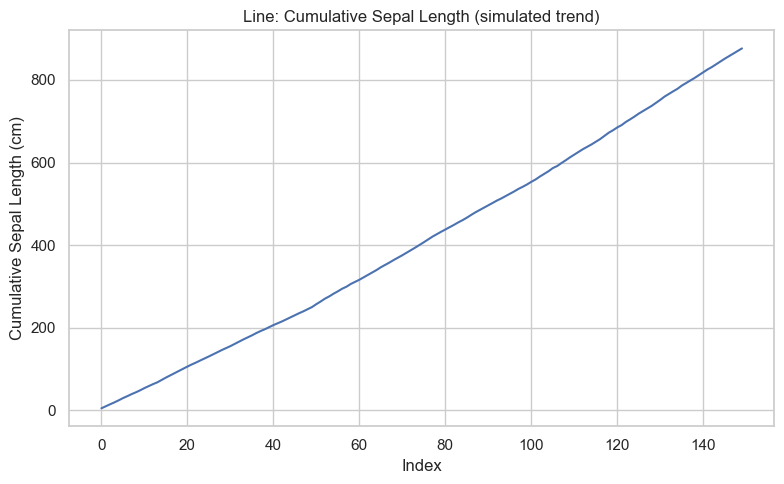

In [ ]:
plt.figure()
df_clean["sepal length (cm)"].cumsum().plot()
plt.title("Line: Cumulative Sepal Length (simulated trend)")
plt.xlabel("Index")
plt.ylabel("Cumulative Sepal Length (cm)")
plt.tight_layout()
plt.show()

**EXPLANATION**
In my noebook the dataset has no time column so i used cumsum to illustrate a trend plot

C:\Users\Joan\AppData\Local\Temp\ipykernel_5236\808057733.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='species', y='petal length (cm)', data=df_clean, ci=None)


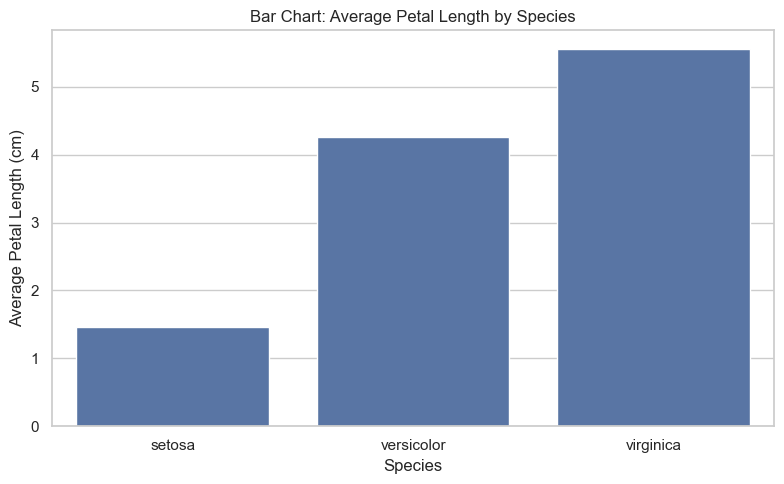

In [ ]:
plt.figure()
sns.barplot(x='species', y='petal length (cm)', data=df_clean, ci=None)
plt.title("Bar Chart: Average Petal Length by Species")
plt.xlabel("Species")
plt.ylabel("Average Petal Length (cm)")
plt.tight_layout()
plt.show()

### Findings – Bar Chart
- The bar chart shows average petal length across the three Iris species.  
- *Setosa* has the **smallest average petal length**, clearly separated from the other two species.  
- *Virginica* has the **largest petal length**, while *Versicolor* sits between Setosa and Virginica.  
- Petal length is therefore a strong distinguishing feature between species.


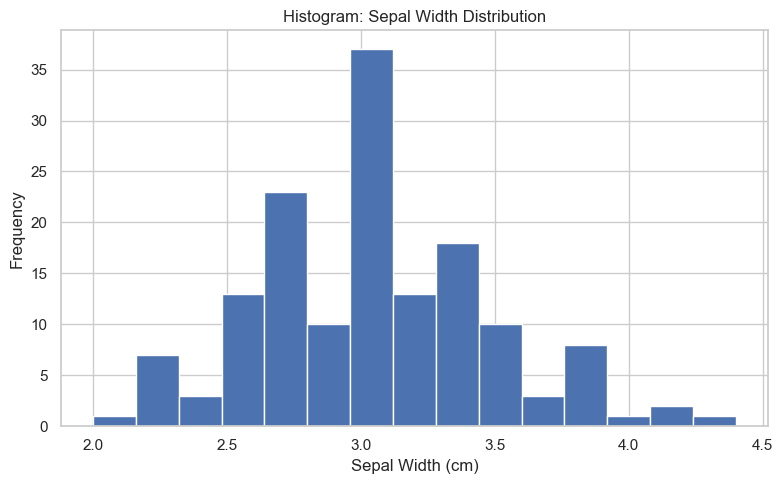

In [ ]:
plt.figure()
plt.hist(df_clean["sepal width (cm)"], bins=15)
plt.title("Histogram: Sepal Width Distribution")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


### Findings – Histogram
- The histogram of sepal width shows most values are concentrated between **2.5 and 3.5 cm**.  
- A slight right skew is present, indicating some flowers with unusually wide sepals.  
- The distribution suggests that sepal width may be less effective than petal length in separating species.


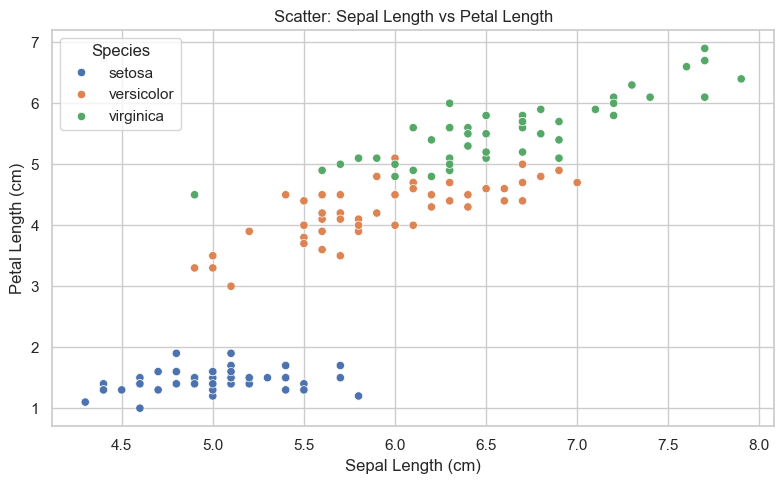

In [ ]:
plt.figure()
sns.scatterplot(x="sepal length (cm)", y="petal length (cm)", hue="species", data=df_clean)
plt.title("Scatter: Sepal Length vs Petal Length")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend(title="Species")
plt.tight_layout()
plt.show()

### Findings – Scatter Plot
- The scatter plot of sepal length vs. petal length shows clear clusters by species.  
- *Setosa* points are clustered tightly with small petal lengths.  
- *Versicolor* and *Virginica* overlap somewhat, but Virginica tends to have larger values.  
- This visual confirms that petal measurements are key for distinguishing species.


In [ ]:
plt.savefig("scatter_sepal_vs_petal.png", bbox_inches="tight")

<Figure size 800x500 with 0 Axes>

In [ ]:
def safe_read_csv(path):
    try:
        return pd.read_csv(path)
    except FileNotFoundError:
        print("File not found:", path)
    except pd.errors.EmptyDataError:
        print("File is empty:", path)
    except Exception as e:
        print("Other error reading CSV:", e)